In [9]:
import time
import glob
import torch
import os
import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

import platform


tiny=True
if platform.node() == 'GPPGIS06':
    print('GPPGIS06')
#     source = r"C:\Users\lerryw\Google Drive\acacia_dataset\data\t1f_22.tif" #  U:\T1F\Processed
    source = r"U:\T2D\Output\T2D_30cm.tif"
    cfg = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg"
    weights = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\weights\\last_1cls_1300.pt"
    names = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\acacia.names"
   
    
    source_op = "C:\\Development\\dev_tools\\tree-detector-yolo\\data\\keresa0006_0012.tif"
    if tiny:
        cfg_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3-tiny3-1cls.cfg"
        weights_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_op_tiny_100.pt"
        names_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
    else:
        cfg_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3_spp_1cls_op.cfg"
        weights_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_oilpalm_wv_300.pt"
        names_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
    
elif platform.node() == 'LWS-PC':
    print('LWS-PC')
    source= r'E:\GDrive\acacia_dataset\data\img.tif'
    cfg = "E:\\GDrive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg"
    weights = "E:\\GDrive\\acacia_dataset\\weights\\last_1cls_1300.pt"
    names = "E:\\GDrive\\acacia_dataset\\acacia.names"
    
    source_op = r"E:\GDrive\satellite_dataset\worldview\data\Keresa_Pansharped_765_6.tif"
    cfg_op = r"E:\GDrive\satellite_dataset\worldview\cfg\yolov3_spp_1cls_op.cfg"
    weights_op = r"E:\GDrive\satellite_dataset\worldview\weights\best_oilpalm_wv_300.pt"
    names_op = r"E:\GDrive\satellite_dataset\worldview\op.names"
    


PyTorch 1.5.1 _CudaDeviceProperties(name='Quadro K620', major=5, minor=0, total_memory=2048MB, multi_processor_count=3)
GPPGIS06


In [10]:
acacia = True
if acacia:
    outfilename=os.path.splitext(os.path.basename(source))[0]
    fd_name = 'output_' + outfilename
    print('[INFO] output will be saved in',fd_name)
    !python detectv2.py --source="{source}" \
    --output=./"{fd_name}" \
    --cfg="{cfg}" \
    --weights="{weights}" \
    --names="{names}" \
    --conf-thres 0.1 \
    --iou-thres 0.4 \
    --agnostic-nms --augment --ratio --save-img
else:
    outfilename=os.path.splitext(os.path.basename(source_op))[0]
    fd_name = 'output_' + outfilename
    !python detectv2.py --source="{source_op}" \
    --output=./"{fd_name}" \
    --cfg="{cfg_op}" \
    --weights="{weights_op}" \
    --names="{names_op}" \
    --conf-thres 0.1 \
    --iou-thres 0.2 \
    --agnostic-nms --augment --ratio --save-img

[INFO] output will be saved in output_T2D_30cm
Namespace(agnostic_nms=True, augment=True, cfg='C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg', classes=None, conf_thres=0.2, device='', half=False, img_size=416, iou_thres=0.4, names='C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\acacia.names', output='./output_T2D_30cm', ratio=True, save_img=True, save_txt=False, source='U:\\T2D\\Output\\T2D_30cm.tif', view_img=False, weights='C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\weights\\last_1cls_1300.pt')
Using CUDA device0 _CudaDeviceProperties(name='Quadro K620', total_memory=2048MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Total object before NMS :  24874
Total object detected :  22995
Done. (792.342s)


In [30]:
!python detectv2.py --source="{source_op}" \
--output=./output \
--cfg="C:\Users\lerryw\Google Drive\satellite_dataset\worldview\cfg\yolov3-spp-1cls.cfg" \
--weights="C:\Users\lerryw\Google Drive\satellite_dataset\worldview\weights\best_oilpalm_wv_100.pt" \
--names="C:\Users\lerryw\Google Drive\satellite_dataset\worldview\op.names" \
--conf-thres 0.1 \
--iou-thres 0.2 \
--agnostic-nms \
--augment \
--ratio \
--save-img

Namespace(agnostic_nms=True, augment=True, cfg='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3-spp-1cls.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.2, names='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names', output='./output', ratio=True, save_img=True, save_txt=False, source='C:\\Development\\dev_tools\\tree-detector-yolo\\data\\keresa0006_0012.tif', view_img=False, weights='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_oilpalm_wv_100.pt')
Using CUDA device0 _CudaDeviceProperties(name='Quadro K620', total_memory=2048MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Total object before NMS :  1680
Total object detected :  412
Done. (20.666s)


In [69]:
# acacia = True
# if acacia:
#     !python detectv3.py --source="{source}" \
#     --output=./output \
#     --cfg="{cfg}" \
#     --weights="{weights}" \
#     --names="{names}" \
#     --conf-thres 0.2 \
#     --iou-thres 0.3
# else:
#     !python detectv3.py --source="{source_op}" \
#     --output=./output2 \
#     --cfg="{cfg_op}" \
#     --weights="{weights_op}" \
#     --names="{names_op}" \
#     --conf-thres 0.2 \
#     --iou-thres 0.6

In [ ]:
acacia = False
if acacia:
    !python detectv2.py --source="{source}" \
    --output=./output \
    --cfg="{cfg}" \
    --weights="{weights}" \
    --names="{names}" \
    --conf-thres 0.2 \
    --iou-thres 0.4 \
    --agnostic-nms \
    --augment \
    --ratio
else:
    !python detectv2.py --source="{source_op}" \
    --output=./output2 \
    --cfg="{cfg_op}" \
    --weights="{weights_op}" \
    --names="{names_op}" \
    --conf-thres 0.1 \
    --iou-thres 0.2 \
    --agnostic-nms \
    --augment \
    --ratio \
    --save-img

# PLOT

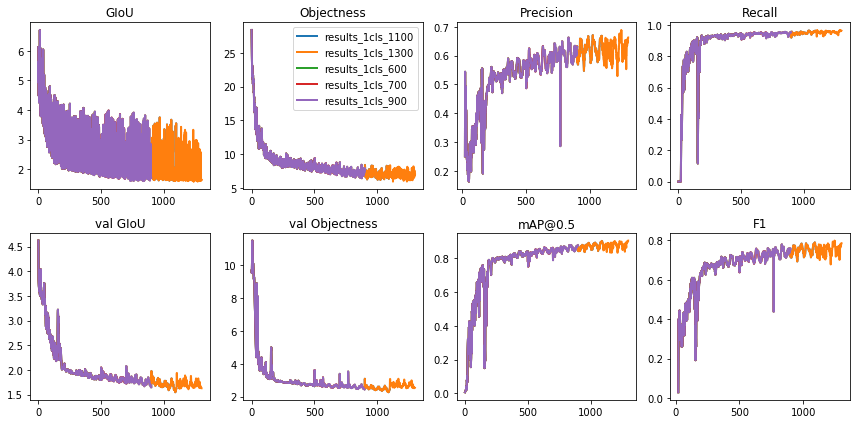

In [13]:
import glob
import math
import os
import random
import shutil
import subprocess
import time
from copy import copy
from pathlib import Path
from sys import platform

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm

file_path = r'C:\Users\lerryw\Google Drive\acacia_dataset\results_1cls_*.txt'

def plots(start=0, stop=0, id=()):  # from utils.utils import *; plot_results()
    # Plot training 'results*.txt' as seen in https://github.com/ultralytics/yolov3#training
    fig, ax = plt.subplots(2, 4, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    # s = ['GIoU', 'Objectness', 'Classification', 'Precision', 'Recall',
    #      'val GIoU', 'val Objectness', 'val Classification', 'mAP@0.5', 'F1']
    s = ['GIoU', 'Objectness', 'Precision', 'Recall',
         'val GIoU', 'val Objectness', 'mAP@0.5', 'F1']
    files = glob.glob(file_path)
    for f in sorted(files):
        try:
            # results = np.loadtxt(f, usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11], ndmin=2).T
            results = np.loadtxt(f, usecols=[2, 3, 8, 9, 12, 13, 10, 11], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(8):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # dont show zero loss values
                    # y /= y[0]  # normalize
                ax[i].plot(x, y, marker='', label=Path(f).stem, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except:
            print('Warning: Plotting error for %s, skipping file' % f)

    ax[1].legend()
    # fig.savefig('/content/acacia/training_results.png', dpi=360)

plots()